In [ ]:
import numpy as np
import matplotlib.pyplot as plt



file = "Template-Normalisation.csv"
Conditions = []
Valeurs = []

with open(file, 'r') as f:
    for l, line in enumerate(f.readlines()):
        if l != 0:
            line_list = line.split(',')
            if line_list[0] != '""':
                gene = line_list[0].split('"')[1]
            conditionSVF = line_list[1].split()[:2]
            conditionSVF = ' '.join(conditionSVF).split('"')[1]
            conditionJour = line_list[1].split()[2].split('"')[0]

            Conditions.append([gene, conditionSVF, conditionJour])

            val = float(line_list[6].split('"')[1])
            Valeurs.append(val)


# Organiser les données
data = {}
for (gene, svf, jour), valeur in zip(Conditions, Valeurs):
    if svf not in data:
        data[svf] = {}
    if jour not in data[svf]:
        data[svf][jour] = {}
    data[svf][jour][gene] = valeur

# Paramètres pour le tracé
genes = list(set([cond[0] for cond in Conditions]))
jours = sorted(set([cond[2] for cond in Conditions]))
svfs = sorted(data.keys())
colors = plt.cm.tab10(np.linspace(0, 1, len(genes)))

module://matplotlib_inline.backend_inline


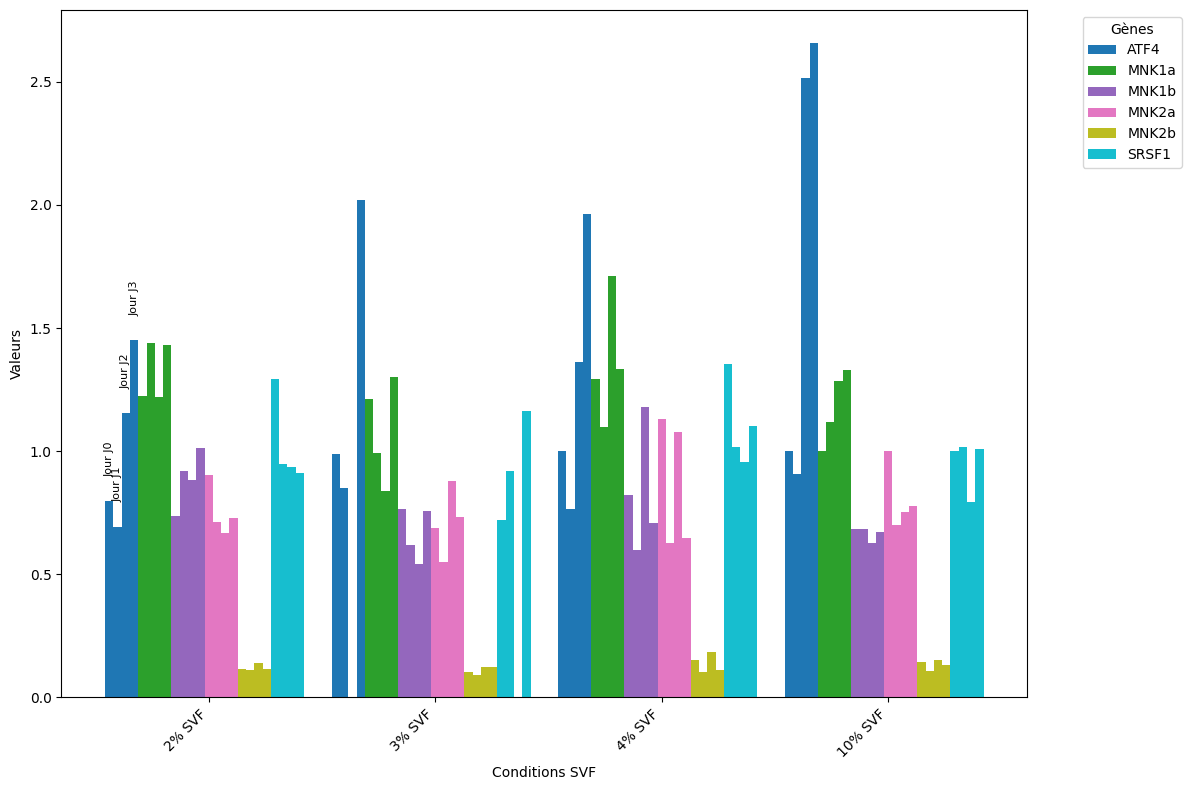

In [12]:
# Paramètres pour le tracé
genes = sorted(set([cond[0] for cond in Conditions]))  # Trier les gènes pour un ordre cohérent
jours = sorted(set([cond[2] for cond in Conditions]))
svfs = ['2% SVF', '3% SVF', '4% SVF', '10% SVF']  # Ordre personnalisé des conditions SVF
colors = plt.cm.tab10(np.linspace(0, 1, len(genes)))  # Couleurs pour chaque gène

# Création de la figure
fig, ax = plt.subplots(figsize=(12, 8))

# Tracer les barres
bar_width = 0.15  # Largeur des barres
spacing = 0.5     # Espacement entre les groupes de barres

for i, svf in enumerate(svfs):  # Parcourir les conditions SVF
    for k, gene in enumerate(genes):  # Parcourir les gènes
        for j, jour in enumerate(jours):  # Parcourir les jours
            if jour in data[svf] and gene in data[svf][jour]:
                valeur = data[svf][jour][gene]
                # Calcul de la position de la barre
                x_pos = i * (len(genes) * len(jours) * bar_width + spacing) + k * len(jours) * bar_width + j * bar_width
                ax.bar(
                    x_pos,              # Position horizontale
                    valeur,             # Hauteur de la barre
                    width=bar_width,    # Largeur de la barre
                    color=colors[k],    # Couleur par gène
                    label=gene if i == 0 and j == 0 else None  # Légende unique
                )
                # Ajouter une annotation pour indiquer le jour uniquement pour la première colonne dans 2% SVF
                if svf == '2% SVF' and k == 0:
                    ax.text(
                        x_pos, valeur + 0.1, f"Jour {jour}", ha='center', va='bottom', fontsize=8, rotation=90
                    )

# Personnalisation de l'axe
ax.set_xticks([i * (len(genes) * len(jours) * bar_width + spacing) + (len(genes) * len(jours) * bar_width) / 2 for i in range(len(svfs))])
ax.set_xticklabels(svfs, rotation=45, ha='right')
ax.set_ylabel("Valeurs")
ax.set_xlabel("Conditions SVF")
# ax.set_title("Barres verticales regroupées par gène, condition SVF et jour")
ax.legend(title="Gènes", bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajuster les marges
plt.tight_layout()

# Afficher la figure
plt.show()

/home/thomas.louvet/Documents/ScriptsPrincipaux/Brouillons


FileNotFoundError: [Errno 2] No such file or directory: 'Documents/ScriptsPrincipaux/BEATAMLdata/BEATAML_NormalizedExpression.tsv'